In [3]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # you can use yolov8s.pt, yolov8m.pt, etc.
results = model("image.jpg")  # Inference on an image
results.show()  # Visualize results
results.save()  # Save results to 'runs/detect/predict'


image 1/1 /Users/ujjwalraj/Desktop/Ewaste/image.jpg: 640x640 1 tv, 81.7ms
Speed: 1.1ms preprocess, 81.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'show'

In [5]:
results = model("image.jpg")     # This returns a list
results[0].show()                # Access the first result and show it


image 1/1 /Users/ujjwalraj/Desktop/Ewaste/image.jpg: 640x640 1 tv, 103.4ms
Speed: 3.6ms preprocess, 103.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
from ultralytics import YOLO
import cv2

# Load the YOLOv8 model (e.g., small version)
model = YOLO("yolov8s.pt")  # or 'yolov8n.pt', 'yolov8m.pt', etc.

# Start the webcam
cap = cv2.VideoCapture(0)  # 0 is the default webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference on the frame
    results = model.predict(source=frame, show=False, conf=0.5)

    # Draw results on the frame
    annotated_frame = results[0].plot()

    # Show the output
    cv2.imshow("YOLOv8 - Real-Time Detection", annotated_frame)

    # Break on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release and close everything
cap.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 118.2ms
Speed: 2.6ms preprocess, 118.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 192.9ms
Speed: 2.0ms preprocess, 192.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 100.5ms
Speed: 2.2ms preprocess, 100.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 tv, 101.8ms
Speed: 1.4ms preprocess, 101.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 195.2ms
Speed: 1.6ms preprocess, 195.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 102.0ms
Speed: 1.2ms preprocess, 102.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 100.6ms
Speed: 1.4ms preprocess, 100.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 106.8ms
Speed: 1.2ms preprocess, 106.8ms inference, 1.0ms postprocess per im

In [7]:
import os
from PIL import Image
from collections import Counter

# Path to your images folder
image_dir = "E-waste/valid/images"

# Supported image extensions
image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".webp"]

# Gather image file paths
image_files = [f for f in os.listdir(image_dir) if os.path.splitext(f)[1].lower() in image_extensions]

# Initialize stats
image_count = len(image_files)
dimensions = []

print(f"📁 Total images found: {image_count}")

# Loop through and collect dimension info
for img_file in image_files:
    try:
        with Image.open(os.path.join(image_dir, img_file)) as img:
            dimensions.append(img.size)  # (width, height)
    except Exception as e:
        print(f"❌ Could not open {img_file}: {e}")

# Count resolution frequencies
dim_counter = Counter(dimensions)
most_common_dims = dim_counter.most_common(5)

print("\n🖼️ Most common image resolutions:")
for dim, count in most_common_dims:
    print(f"   {dim} - {count} images")

print(f"\n✅ Dataset check complete. {image_count} images scanned.")

📁 Total images found: 1444

🖼️ Most common image resolutions:
   (640, 640) - 1444 images

✅ Dataset check complete. 1444 images scanned.


In [8]:
import os
from collections import Counter

# Paths
base_path = "E-waste/train"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

# Get list of image and label filenames (without extensions)
image_files = [os.path.splitext(f)[0] for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
label_files = [os.path.splitext(f)[0] for f in os.listdir(labels_path) if f.endswith('.txt')]

# Summary
total_images = len(image_files)
total_labels = len(label_files)

# Check mismatches
missing_labels = set(image_files) - set(label_files)
orphan_labels = set(label_files) - set(image_files)

print(f"📊 Total images: {total_images}")
print(f"📝 Total label files: {total_labels}")
print(f"⚠️ Images with missing labels: {len(missing_labels)}")
print(f"⚠️ Label files with no matching image: {len(orphan_labels)}")

if missing_labels:
    print("\nMissing label files for:")
    print("\n".join(list(missing_labels)[:5]))  # show top 5

if orphan_labels:
    print("\nOrphan label files:")
    print("\n".join(list(orphan_labels)[:5]))  # show top 5

# Analyze class distribution
class_counter = Counter()
for file in label_files:
    label_path = os.path.join(labels_path, file + ".txt")
    try:
        with open(label_path, "r") as f:
            for line in f:
                class_id = line.strip().split()[0]
                class_counter[class_id] += 1
    except Exception as e:
        print(f"Error reading {label_path}: {e}")

print("\n📈 Class distribution (class_id: count):")
for class_id, count in class_counter.items():
    print(f"  {class_id}: {count} annotations")

print("\n✅ Dataset label inspection complete.")

📊 Total images: 4991
📝 Total label files: 4991
⚠️ Images with missing labels: 0
⚠️ Label files with no matching image: 0

📈 Class distribution (class_id: count):
  21: 147 annotations
  2: 136 annotations
  30: 136 annotations
  14: 145 annotations
  18: 149 annotations
  35: 134 annotations
  29: 161 annotations
  36: 172 annotations
  0: 180 annotations
  9: 151 annotations
  10: 160 annotations
  32: 142 annotations
  11: 144 annotations
  25: 167 annotations
  15: 144 annotations
  34: 134 annotations
  28: 162 annotations
  7: 145 annotations
  22: 146 annotations
  16: 145 annotations
  4: 205 annotations
  17: 150 annotations
  13: 139 annotations
  5: 145 annotations
  24: 130 annotations
  31: 189 annotations
  26: 147 annotations
  19: 151 annotations
  27: 147 annotations
  33: 162 annotations
  8: 150 annotations
  3: 143 annotations
  6: 147 annotations
  23: 142 annotations
  12: 178 annotations
  20: 134 annotations
  1: 131 annotations

✅ Dataset label inspection comple

In [9]:
# Sort classes by count (optional)
classes, counts = zip(*sorted(zip(classes, counts), key=lambda x: x[1], reverse=True))

NameError: name 'classes' is not defined

/var/folders/y3/y01h3w0s4sldyhwtlxfpx31c0000gn/T/ipykernel_78198/2377858428.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/ujjwalraj/Desktop/Ewaste/yolov5-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


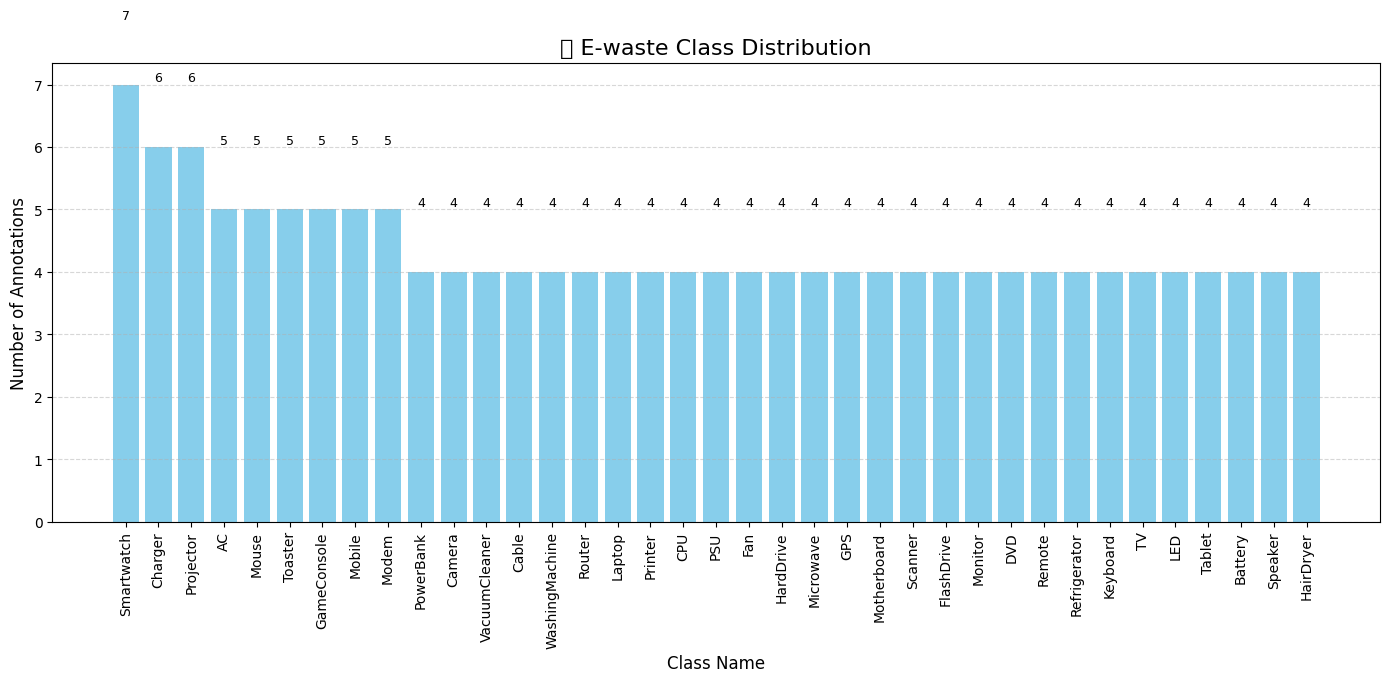

: 

In [ ]:
import os
import yaml
from collections import Counter
import matplotlib.pyplot as plt

# --- Paths ---
labels_path = "E-waste-mini/valid/labels"  # path to your YOLO labels
yaml_path = "E-waste-mini/custom.yaml"             # path to your YAML file

# --- Load class names from custom.yaml ---
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)
    class_names = data['names']  # dictionary: {0: 'Battery', 1: 'Laptop', ..., 36: 'Smartwatch'}

# --- Count class occurrences ---
class_counter = Counter()

for label_file in os.listdir(labels_path):
    if label_file.endswith(".txt"):
        with open(os.path.join(labels_path, label_file), "r") as f:
            for line in f:
                if line.strip():  # skip empty lines
                    class_id = int(line.strip().split()[0])
                    class_counter[class_id] += 1

# --- Prepare data for plot ---
classes = [class_names[cid] for cid in class_counter.keys()]
counts = [class_counter[cid] for cid in class_counter.keys()]

# --- Optional: Sort by count (descending) ---
classes, counts = zip(*sorted(zip(classes, counts), key=lambda x: x[1], reverse=True))

# --- Plot ---
plt.figure(figsize=(14, 7))
bars = plt.bar(classes, counts, color='skyblue')
plt.title("📊 E-waste Class Distribution", fontsize=16)
plt.xlabel("Class Name", fontsize=12)
plt.ylabel("Number of Annotations", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

/var/folders/y3/y01h3w0s4sldyhwtlxfpx31c0000gn/T/ipykernel_10924/1140225240.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


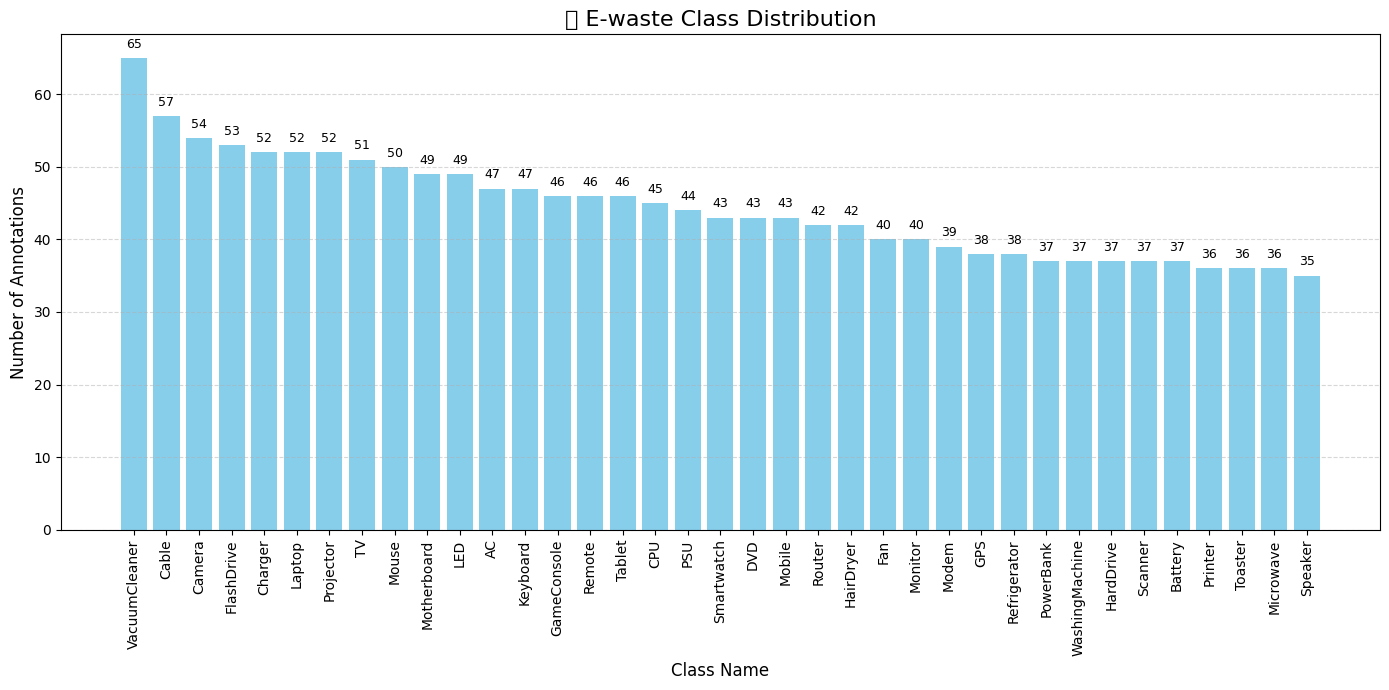

In [5]:
import os
import yaml
from collections import Counter
import matplotlib.pyplot as plt

# --- Paths ---
labels_path = "E-waste/valid/labels"  # path to your YOLO labels
yaml_path = "E-waste/custom.yaml"             # path to your YAML file

# --- Load class names from custom.yaml ---
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)
    class_names = data['names']  # dictionary: {0: 'Battery', 1: 'Laptop', ..., 36: 'Smartwatch'}

# --- Count class occurrences ---
class_counter = Counter()

for label_file in os.listdir(labels_path):
    if label_file.endswith(".txt"):
        with open(os.path.join(labels_path, label_file), "r") as f:
            for line in f:
                if line.strip():  # skip empty lines
                    class_id = int(line.strip().split()[0])
                    class_counter[class_id] += 1

# --- Prepare data for plot ---
classes = [class_names[cid] for cid in class_counter.keys()]
counts = [class_counter[cid] for cid in class_counter.keys()]

# --- Optional: Sort by count (descending) ---
classes, counts = zip(*sorted(zip(classes, counts), key=lambda x: x[1], reverse=True))

# --- Plot ---
plt.figure(figsize=(14, 7))
bars = plt.bar(classes, counts, color='skyblue')
plt.title("📊 E-waste Class Distribution", fontsize=16)
plt.xlabel("Class Name", fontsize=12)
plt.ylabel("Number of Annotations", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [2]:
import os
import yaml
from collections import Counter

# --- Paths ---
labels_path = "E-waste/train/labels"  # path to your YOLO labels
yaml_path = "custom.yaml"             # path to your YAML file

# --- Load class names from custom.yaml ---
with open("E-waste/custom.yaml", 'r') as file:
    data = yaml.safe_load(file)
    class_names = data['names']  # dictionary: {0: 'Battery', 1: 'Laptop', ..., 36: 'Smartwatch'}

# --- Count class occurrences ---
class_counter = Counter()

for label_file in os.listdir(labels_path):
    if label_file.endswith(".txt"):
        with open(os.path.join(labels_path, label_file), "r") as f:
            for line in f:
                if line.strip():  # skip empty lines
                    class_id = int(line.strip().split()[0])
                    class_counter[class_id] += 1

# --- Sort by count (descending) ---
sorted_classes = sorted(class_counter.items(), key=lambda x: x[1], reverse=True)

# --- Print results ---
print("📦 Class-wise Annotation Counts in Training Dataset:\n")
print(f"{'Class ID':<10} {'Class Name':<20} {'Count':<10}")
print("-" * 45)
for class_id, count in sorted_classes:
    class_name = class_names[class_id]
    print(f"{class_id:<10} {class_name:<20} {count:<10}")

📦 Class-wise Annotation Counts in Training Dataset:

Class ID   Class Name           Count     
---------------------------------------------
4          Mouse                205       
31         Projector            189       
0          Battery              180       
12         Charger              178       
36         Smartwatch           172       
25         VacuumCleaner        167       
28         Scanner              162       
33         GameConsole          162       
29         Modem                161       
10         TV                   160       
9          DVD                  151       
19         Cable                151       
17         Speaker              150       
8          HardDrive            150       
18         Camera               149       
21         Tablet               147       
26         Microwave            147       
27         Toaster              147       
6          Printer              147       
22         PowerBank            146      

In [8]:
from ultralytics import YOLO

# Load pre-trained YOLOv8 nano model
model = YOLO('yolov8n.pt')

# Train on custom e-waste dataset
model.train(
    data='/Users/ujjwalraj/Desktop/Ewaste/E-waste-mini/custom.yaml',
    epochs=10,
    imgsz=416,
    batch=16,
    name='yolov8n-ewaste',
    patience=5
)

Ultralytics 8.3.107 🚀 Python-3.12.4 torch-2.6.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/ujjwalraj/Desktop/Ewaste/E-waste-mini/custom.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n-ewaste10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /Users/ujjwalraj/Desktop/Ewaste/E-waste-mini/train/labels... 370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 370/370 [00:00<00:00, 3081.41it/s]

train: New cache created: /Users/ujjwalraj/Desktop/Ewaste/E-waste-mini/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 143, len(boxes) = 407. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /Users/ujjwalraj/Desktop/Ewaste/E-waste-mini/train/labels.cache... 370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 370/370 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 143, len(boxes) = 407. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /Users/ujjwalraj/runs/detect/yolov8n-ewaste10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000244, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to /Users/ujjwalraj/runs/detect/yolov8n-ewaste10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9122        4.5      1.274          2        416: 100%|██████████| 24/24 [01:10<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:33<00:00,  2.81s/it]

                   all        370        407          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10         0G     0.7815      4.338      1.166          2        416: 100%|██████████| 24/24 [01:15<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:31<00:00,  2.63s/it]

                   all        370        407     0.0173     0.0838     0.0385     0.0364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/10         0G     0.7714      4.135      1.199          2        416: 100%|██████████| 24/24 [01:28<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:34<00:00,  2.90s/it]

                   all        370        407     0.0579      0.473      0.125      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/10         0G     0.7411      3.898      1.176          2        416: 100%|██████████| 24/24 [01:19<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:35<00:00,  2.96s/it]

                   all        370        407      0.776      0.158      0.239      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.7673      3.712      1.187          2        416: 100%|██████████| 24/24 [01:30<00:00,  3.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:37<00:00,  3.10s/it]

                   all        370        407      0.512      0.313      0.307      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.7694      3.499      1.207          2        416: 100%|██████████| 24/24 [01:37<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:41<00:00,  3.42s/it]

                   all        370        407      0.574      0.371      0.385      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.7501      3.335      1.147          2        416: 100%|██████████| 24/24 [01:40<00:00,  4.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:44<00:00,  3.67s/it]

                   all        370        407      0.569       0.44      0.471      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.7343      3.175      1.133          2        416: 100%|██████████| 24/24 [01:56<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:45<00:00,  3.83s/it]

                   all        370        407      0.649      0.448      0.518      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.6798      3.103      1.131          2        416: 100%|██████████| 24/24 [01:54<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:39<00:00,  3.27s/it]

                   all        370        407      0.682      0.483      0.543      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.6865      3.021      1.137          2        416: 100%|██████████| 24/24 [01:31<00:00,  3.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:36<00:00,  3.02s/it]

                   all        370        407      0.681      0.496      0.559      0.486



10 epochs completed in 0.363 hours.
Optimizer stripped from /Users/ujjwalraj/runs/detect/yolov8n-ewaste10/weights/last.pt, 6.2MB
Optimizer stripped from /Users/ujjwalraj/runs/detect/yolov8n-ewaste10/weights/best.pt, 6.2MB

Validating /Users/ujjwalraj/runs/detect/yolov8n-ewaste10/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.12.4 torch-2.6.0 CPU (Apple M1)
Model summary (fused): 72 layers, 3,012,863 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:36<00:00,  3.04s/it]


                   all        370        407      0.684      0.495      0.559      0.487
               Battery         10         11      0.436      0.818       0.55      0.514
                Laptop         10         10          1          0      0.157      0.135
                Mobile         10         10          1          0     0.0232     0.0118
              Keyboard         10         10      0.723        0.3      0.346      0.191
                 Mouse         10         11          1          0      0.021     0.0176
               Monitor         11         11      0.407      0.909      0.891      0.858
               Printer         10         10          1      0.717      0.906      0.755
                Router         10         10      0.706        0.9      0.878      0.807
             HardDrive         10         10      0.872        0.3      0.685      0.569
                   DVD         10         10      0.488        0.7        0.7      0.642
                    T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x159759f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038

In [ ]:
from ultralytics import YOLO
import cv2

# Load your trained model
model = YOLO('/Users/ujjwalraj/runs/detect/yolov8n-ewaste10/weights/best.pt')

# Open the webcam (0 = default webcam)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Error: Could not open webcam.")
    exit()

print("📸 Press 'q' to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference on the frame
    results = model.predict(source=frame, show=False, conf=0.5)

    # Visualize results on the frame
    annotated_frame = results[0].plot()

    # Show the annotated frame
    cv2.imshow("E-waste Detection", annotated_frame)

    # Quit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up
cap.release()
cv2.destroyAllWindows()

📸 Press 'q' to quit

0: 384x640 (no detections), 52.5ms
Speed: 2.1ms preprocess, 52.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 50.0ms
Speed: 1.3ms preprocess, 50.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 52.4ms
Speed: 1.7ms preprocess, 52.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 56.6ms
Speed: 1.5ms preprocess, 56.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.7ms
Speed: 1.4ms preprocess, 42.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.3ms
Speed: 1.4ms preprocess, 43.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 46.0ms
Speed: 1.4ms preprocess, 46.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 67.6ms
Speed: 1.3ms 

: 